In [70]:
from tensorflow.keras.models import Model, load_model
model = load_model('/content/drive/MyDrive/LSTM/saved_model_stage1_LSTM/LSTM_epoch_1_stage1_not_ori.h5')

In [79]:
import tensorflow as tf
# 加上slice
x = model.output
x = tf.strided_slice(x, [0, -1, 0], [0, 0, 0], [1, 1, 1], begin_mask=5, end_mask=5, shrink_axis_mask=2)

model = Model(inputs=model.input, outputs=x)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35, 128)]         0         
                                                                 
 lstm (LSTM)                 (None, 35, 128)           131584    
                                                                 
 dense (Dense)               (None, 35, 11)            1419      
                                                                 
 softmax (Softmax)           (None, 35, 11)            0         
                                                                 
 tf.strided_slice (TFOpLambd  (None, 11)               0         
 a)                                                              
                                                                 
Total params: 133,003
Trainable params: 133,003
Non-trainable params: 0
_______________________________________________________

In [77]:
import numpy as np
test_data = np.load('/content/drive/MyDrive/LSTM/LSTM_STAGE1/predictions_x_stage1.npy')
test_data_label = np.load('/content/drive/MyDrive/LSTM/LSTM_STAGE1/predictions_y_stage1.npy')

In [78]:
model = load_model('/content/drive/MyDrive/LSTM/saved_model_stage1_LSTM/LSTM_epoch_1_stage1_not_ori.h5')

In [80]:
import numpy as np

data_test = []
data_test_labels = []

for i in range(1000000):
    if i + 35 > len(test_data):
        break
    data_test.append(test_data[i:i + 35, :])
    data_test_labels.append(test_data_label[i:i+35, :])

print(np.shape(data_test))
print(np.shape(data_test_labels))

(77920, 35, 128)
(77920, 35, 12)


In [81]:
import tensorflow as tf
test_data = tf.data.Dataset.from_tensor_slices((data_test, data_test_labels)).batch(12240).prefetch(tf.data.AUTOTUNE).cache()

7/7 [==============================] - 7s 741ms/step
Accuracy: 0.2551
Confusion Matrix:
 [[   1   52  174  309  333  283  395   89   43    0    0    1]
 [   1 1723  479 1293 1173 1101 1238  280  101    6    6   16]
 [   0   40 2657  984 1812  573 1374  316   45    0    0    1]
 [   4   95 1135 2444 1545  774 1562  350   60    1    0    7]
 [   3   95  888 1215 3619  552 1020  377   34    0    0    0]
 [   1   68  509  607  616 4755  971  312   98    0    1    0]
 [   0   45  724  993 1352 1367 2662  445  140    1    0    1]
 [   3   69  769 1030 1705 1232 1990 1103  146    0    0    0]
 [   2  120  582  817 1356 1774 1914  300  863    0    3    2]
 [   0  317  218  736  921  866 1182  254   81   11    1   20]
 [   0  373  287  720 1015  995  847  166  119   12   10   21]
 [   0  239  240  736  796 1032 1223  232   67   25    1   30]]


<Figure size 10000x1200 with 0 Axes>

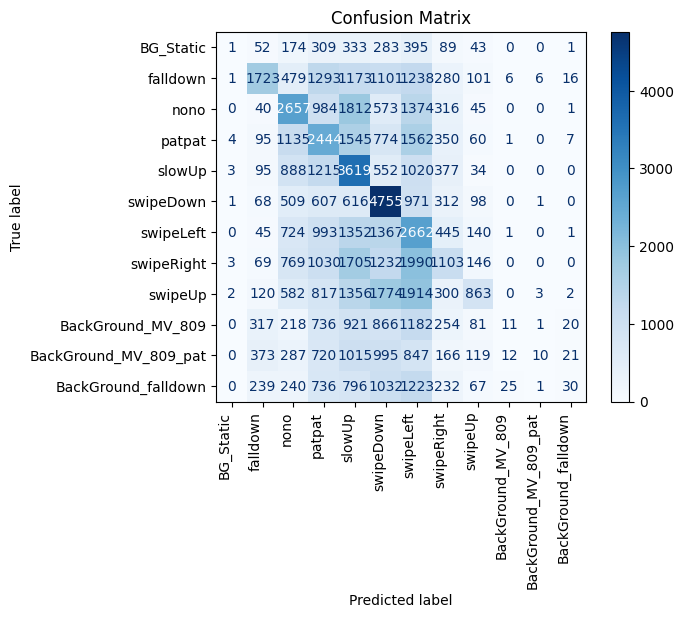

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data_test_labels = np.array(data_test_labels)

y_true = np.argmax(data_test_labels[:, -1, :], axis=1)

y_pred_prob = model.predict(test_data)

y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_true, y_pred)
# 計算精準度(包含各類背景)
accuracy = np.trace(cm) / np.sum(cm)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", cm)

# Gesture class labels
classes = ['BG_Static', 'falldown', 'nono', 'patpat', 'slowUp', 'swipeDown', 'swipeLeft', 'swipeRight', 'swipeUp', 'BackGround_MV_809', 'BackGround_MV_809_pat', 'BackGround_falldown']

# Visualize the confusion matrix using Matplotlib
plt.figure(figsize=(100, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90, ha="right")
plt.title('Confusion Matrix')
plt.show()


7/7 [==============================] - 5s 761ms/step
Accuracy: 0.2561
Confusion Matrix:
 [[ 133  981  919 2501 3065 3176 3647  741  310]
 [  29 1723  479 1293 1173 1101 1238  280  101]
 [   1   40 2657  984 1812  573 1374  316   45]
 [  12   95 1135 2444 1545  774 1562  350   60]
 [   3   95  888 1215 3619  552 1020  377   34]
 [   2   68  509  607  616 4755  971  312   98]
 [   2   45  724  993 1352 1367 2662  445  140]
 [   3   69  769 1030 1705 1232 1990 1103  146]
 [   7  120  582  817 1356 1774 1914  300  863]]


<Figure size 10000x1200 with 0 Axes>

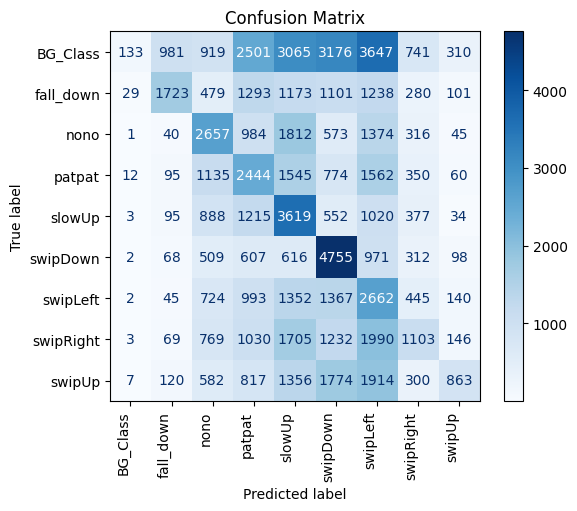

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data_test_labels = np.array(data_test_labels)

y_true = np.argmax(data_test_labels[:, -1, :], axis=1)

y_pred_prob = model.predict(test_data)

y_pred = np.argmax(y_pred_prob, axis=1)

merge_map = {0: 0, 9: 0, 10: 0, 11: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
y_true_merged = np.vectorize(merge_map.get)(y_true)
y_pred_merged = np.vectorize(merge_map.get)(y_pred)
cm = confusion_matrix(y_true_merged, y_pred_merged)
# 計算精準度(所有背景歸為一類)
accuracy = np.trace(cm) / np.sum(cm)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", cm)

classes = ['BG_Class', 'fall_down', 'nono', 'patpat', 'slowUp', 'swipDown', 'swipLeft', 'swipRight', 'swipUp']

plt.figure(figsize=(100, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90, ha="right")
plt.title('Confusion Matrix')
plt.show()
